In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

In [3]:
data = pd.read_csv("ab.csv")
print(data)


    age  average length cycle
0    35                    29
1    35                    29
2    35                    29
3    35                    28
4    35                    29
5    35                    28
6    35                    30
7    35                    28
8    35                    29
9    35                    28
10   35                    29
11   35                    28
12   35                    28
13   35                    28
14   35                    29
15   35                    30
16   35                    29
17   35                    28
18   35                    29
19   35                    29
20   35                    28
21   35                    29
22   35                    28
23   35                    28
24   35                    28
25   35                    29
26   35                    30
27   35                    28
28   35                    30
29   35                    29
30   35                    30
31   35                    28
32   35   

In [4]:
data.head()


,age,average length cycle
0,35,29
1,35,29
2,35,29
3,35,28
4,35,29


In [5]:

data = data["average length cycle"]

In [6]:
#Make sure there are no null values
#sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
data.isnull().value_counts()

False    39
Name: average length cycle, dtype: int64

In [8]:
#Check the datatypes
print(data.dtypes)

int64


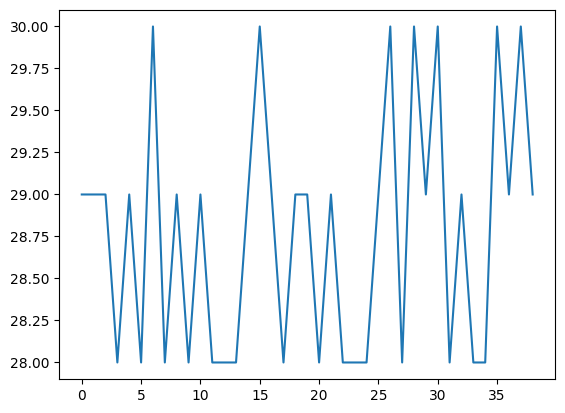

In [9]:
import matplotlib.pyplot as plt
plt.plot(data)

In [10]:
data.dtypes

dtype('int64')

In [11]:
data.head()

0    29
1    29
2    29
3    28
4    29
Name: average length cycle, dtype: int64

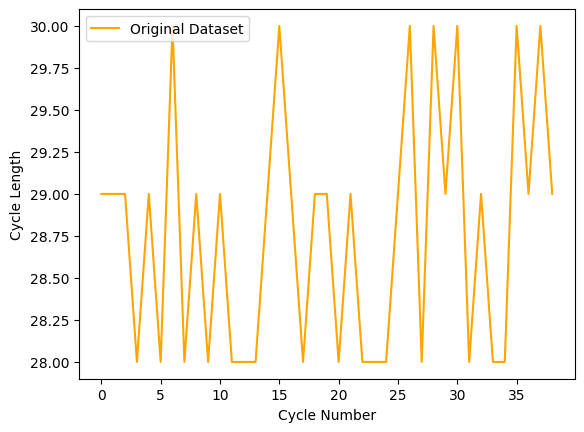

In [12]:
#plt.plot(a,label="Model Prediction",color='blue')
plt.plot(data,label="Original Dataset",color="orange")
plt.xlabel("Cycle Number")
plt.ylabel("Cycle Length")
plt.legend(loc="best")

In [13]:
#Set the index of the Month 
#data.set_index('Timestamp',inplace=True)


In [14]:
#Testing for stationarity
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(data)

(0.0872515227071996, True)

<Axes: >

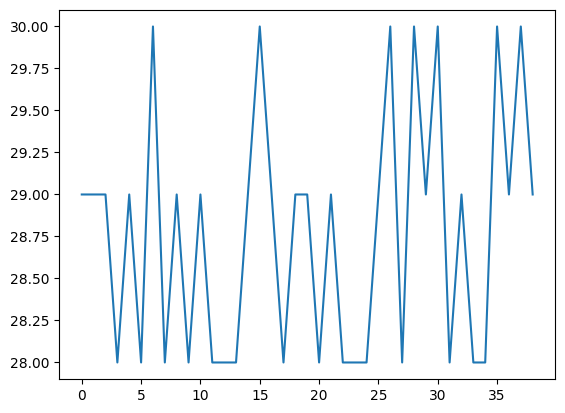

In [15]:
data.plot()

In [16]:
import numpy as np
from statsmodels.tsa.stattools import adfuller

def check_stationarity(data):
    result = adfuller(data)
    pvalue = result[1]
    if pvalue < 0.05:
        print("The data is stationary with p-value", pvalue)
    else:
        print("The data is not stationary with p-value", pvalue)
    
    return pvalue

# check for stationarity in the data
pvalue = check_stationarity(data)

# apply differencing to make the data stationary if necessary
if pvalue >= 0.05:
    differenced_data = data.diff().dropna()
    check_stationarity(differenced_data)
else:
    differenced_data = data




The data is stationary with p-value 8.266232000150067e-10


In [17]:
print(differenced_data)

0     29
1     29
2     29
3     28
4     29
5     28
6     30
7     28
8     29
9     28
10    29
11    28
12    28
13    28
14    29
15    30
16    29
17    28
18    29
19    29
20    28
21    29
22    28
23    28
24    28
25    29
26    30
27    28
28    30
29    29
30    30
31    28
32    29
33    28
34    28
35    30
36    29
37    30
38    29
Name: average length cycle, dtype: int64


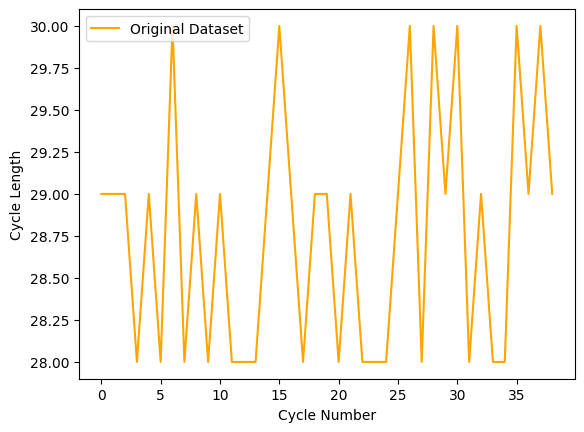

In [18]:
#plt.plot(a,label="Model Prediction",color='blue')
plt.plot(data,label="Original Dataset",color="orange")
plt.xlabel("Cycle Number")
plt.ylabel("Cycle Length")
plt.legend(loc="best")

In [19]:
# spilting the dataset
from sklearn.model_selection import train_test_split

X = differenced_data # dataset

train_size = 0.75
test_size = 1 - train_size
X_train, X_test = train_test_split(X, train_size=train_size, test_size=test_size, shuffle=False)


In [20]:
X_train.tail()

24    28
25    29
26    30
27    28
28    30
Name: average length cycle, dtype: int64

In [21]:
X_test.tail()

34    28
35    30
36    29
37    30
38    29
Name: average length cycle, dtype: int64

In [22]:
X_test.head()

29    29
30    30
31    28
32    29
33    28
Name: average length cycle, dtype: int64

Text(0, 0.5, 'CycleLength')

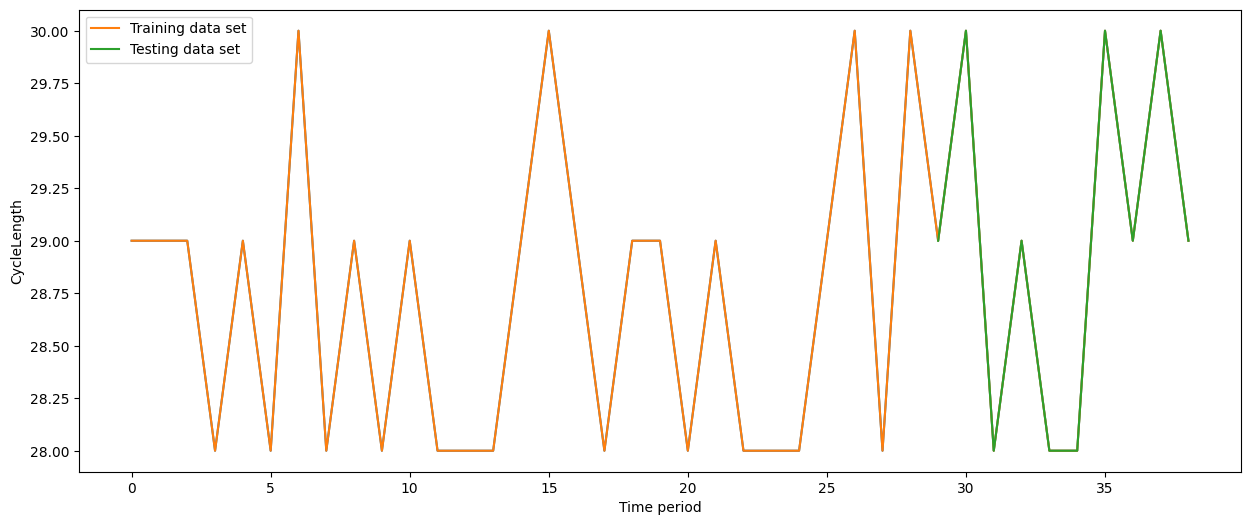

In [23]:
plt.figure(figsize=(15,6))
plt.plot(data)
plt.xlabel("Time period")
plt.ylabel("Average period cycle")
plt.plot(data,label="Training data set")
#plt.plot(range(len(X_train), len(X_train)+len(X_test)), X_test, color='orange', label='test')
plt.plot(X_test,label="Testing data set")
plt.xlabel('Time period')
plt.legend(loc = 'best')
plt.ylabel('CycleLength')



In [24]:
arima_model =  auto_arima(X_train,start_p=0, d=0, start_q=0, 
                          max_p=5, max_d=0, max_q=10, start_P=0, 
                          D=1, start_Q=0, max_P=10, max_D=5,
                          max_Q=5, m=3, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[3] intercept   : AIC=82.326, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[3] intercept   : AIC=77.699, Time=0.02 sec
 ARIMA(0,0,1)(0,1,1)[3] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(0,0,0)(0,1,0)[3]             : AIC=80.358, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[3] intercept   : AIC=83.288, Time=0.01 sec
 ARIMA(1,0,0)(2,1,0)[3] intercept   : AIC=75.467, Time=0.02 sec
 ARIMA(1,0,0)(3,1,0)[3] intercept   : AIC=74.221, Time=0.04 sec
 ARIMA(1,0,0)(4,1,0)[3] intercept   : AIC=73.545, Time=0.08 sec
 ARIMA(1,0,0)(5,1,0)[3] intercept   : AIC=74.299, Time=0.12 sec
 ARIMA(1,0,0)(4,1,1)[3] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(1,0,0)(3,1,1)[3] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(1,0,0)(5,1,1)[3] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,0,0)(4,1,0)[3] intercept   : AIC=74.950, Time=0.06 sec
 ARIMA(2,0,0)(4,1,0)[3] intercept   : AIC=75.425, Time=0.10 sec
 ARIMA(1,0,1)(4,1,0)[3] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,0,1

In [25]:
print(arima_model)

 ARIMA(0,0,1)(4,1,0)[3]          


In [128]:

prediction = pd.DataFrame(arima_model.predict(n_periods = 100),index=X_test.index)
prediction.columns = ['predicted_Cyclelength']
prediction

,predicted_Cyclelength
29,27.068930
30,29.991562
31,28.256811
32,28.116586
33,28.378284
34,28.523979
35,28.793729
36,28.114992
37,29.138342
38,28.625582


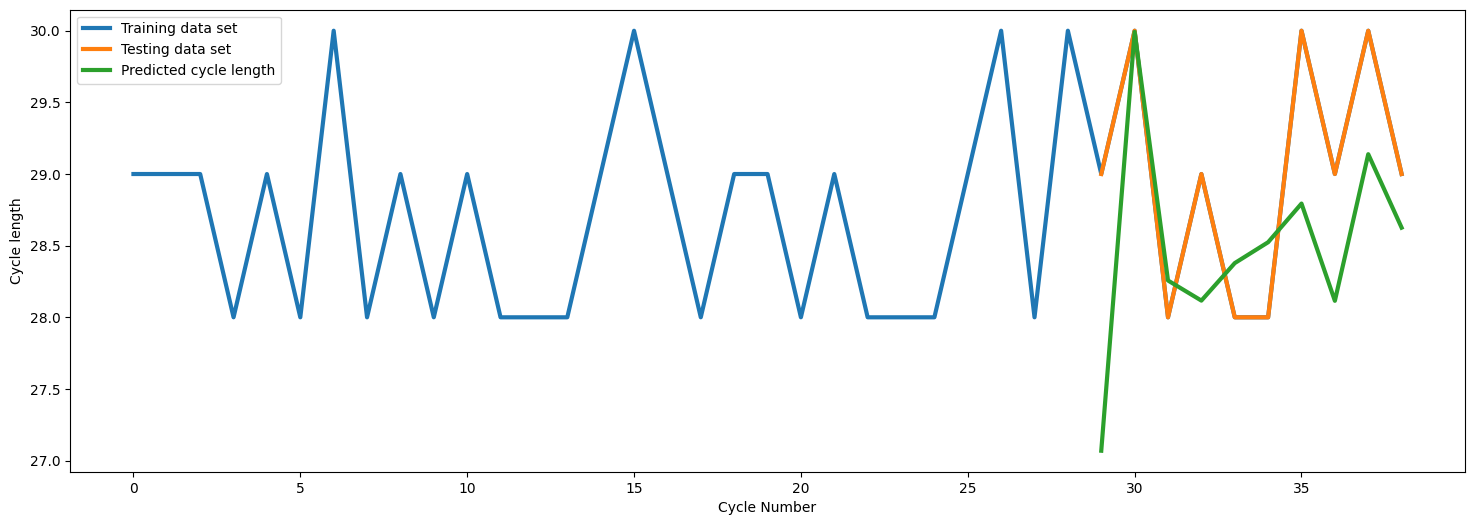

In [129]:
plt.figure(figsize=(18,6))
plt.plot(data,label="Training data set",linewidth=3)
plt.plot(X_test,label="Testing data set",linewidth=3)
plt.plot(prediction,label="Predicted cycle length",linewidth=3)
plt.legend(loc = 'best')
plt.xlabel("Cycle Number")
plt.ylabel("Cycle length")
plt.show()

MAE: 0.730935173907238
RMSE: 0.9007830210481502


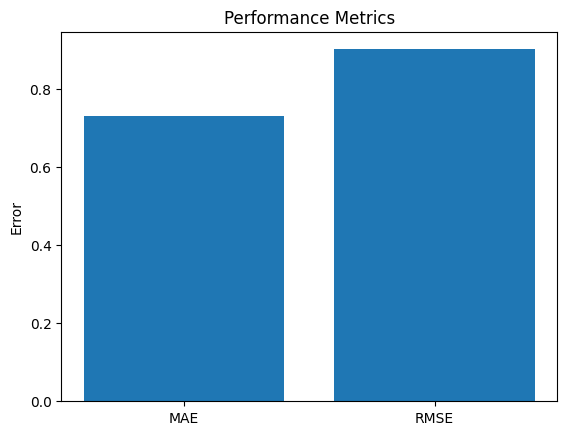

In [138]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


mae = mean_absolute_error(X_test, prediction)
print("MAE:", mae)


rmse = mean_squared_error(X_test, prediction
                          , squared=False)
print("RMSE:", rmse)
plt.figure()
plt.bar(['MAE', 'RMSE'], [mae, rmse])
plt.title('Performance Metrics')
plt.ylabel('Error')
plt.savefig('performance_metrics.png')

In [131]:
print(future_predictions)

39    28.859282
40    28.644162
41    29.337816
42    28.525134
43    28.638054
44    29.451244
45    29.029114
46    28.953715
47    29.248961
48    28.634189
dtype: float64


In [132]:
future=future_predictions+X_test

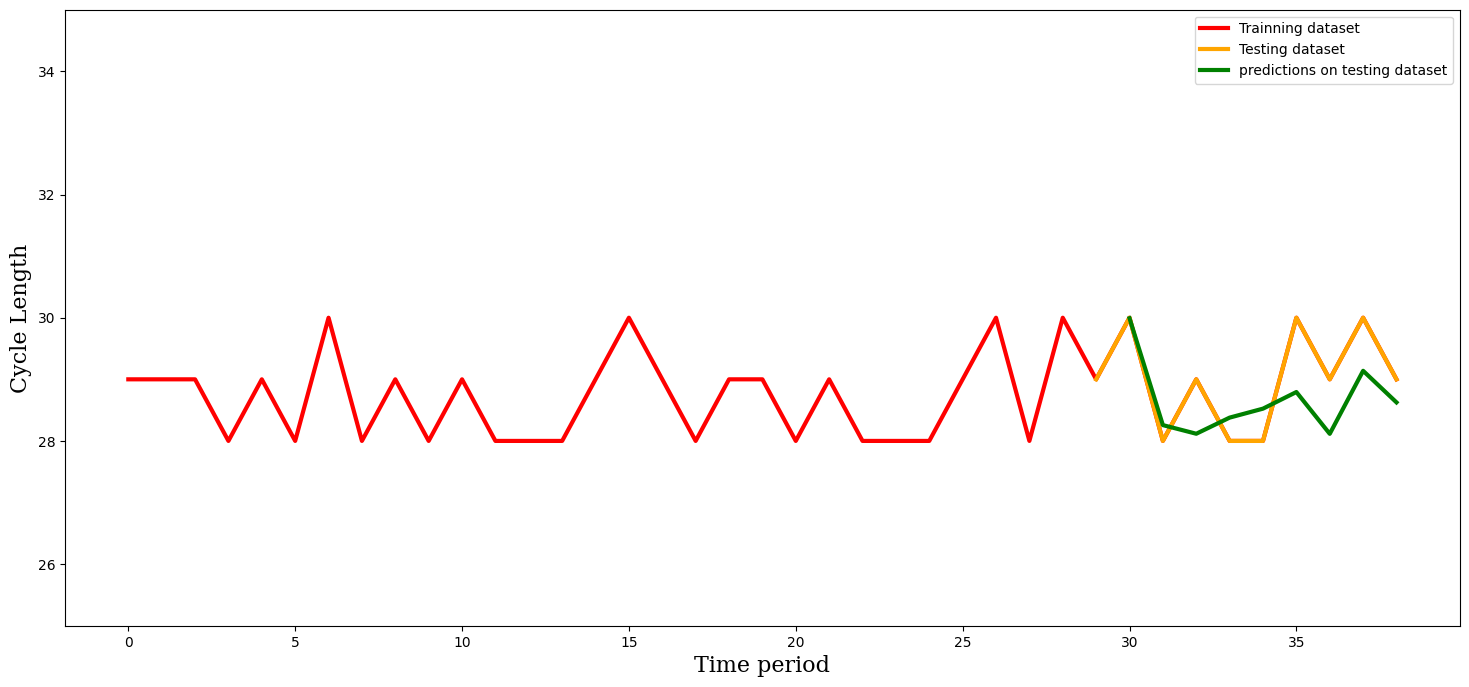

In [133]:
# Concatenate the past values and future predictions
all_prediction = pd.concat([prediction, future_predictions])

plt.figure(figsize=(18,8))
p=prediction
font = {'family': 'serif', 'color': 'black', 'weight': 'normal', 'size': 16}
plt.plot(data,label='Trainning dataset',color='red',linewidth=3 )
plt.plot(X_test, label = 'Testing dataset', color='orange',linewidth=3)
# Plot the past values and future predictions
prediction = prediction.drop(prediction.index[0])

plt.plot(prediction,label='predictions on testing dataset',color='green',linewidth=3)
#plt.plot(future, label = 'Predictions of future value')
#plt.plot(future_predictions, label = 'Predictions of  value',color='black',linewidth=3)
plt.ylim(25, 35)
plt.legend(fontsize=14)



plt.legend(loc='best')
plt.xlabel("Time period", fontdict=font)
plt.ylabel("Cycle Length", fontdict=font)
plt.show()


MAE: 0.7532556287929821
RMSE: 0.8960584569578457


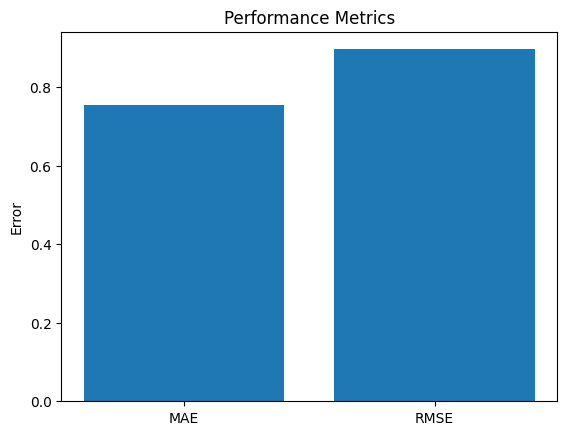

In [137]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


mae = mean_absolute_error(X_test, future_predictions)
print("MAE:", mae)


rmse = mean_squared_error(X_test, future_predictions, squared=False)
print("RMSE:", rmse)
plt.figure()
plt.bar(['MAE', 'RMSE'], [mae, rmse])
plt.title('Performance Metrics')
plt.ylabel('Error')
plt.savefig('performance_metrics.png')

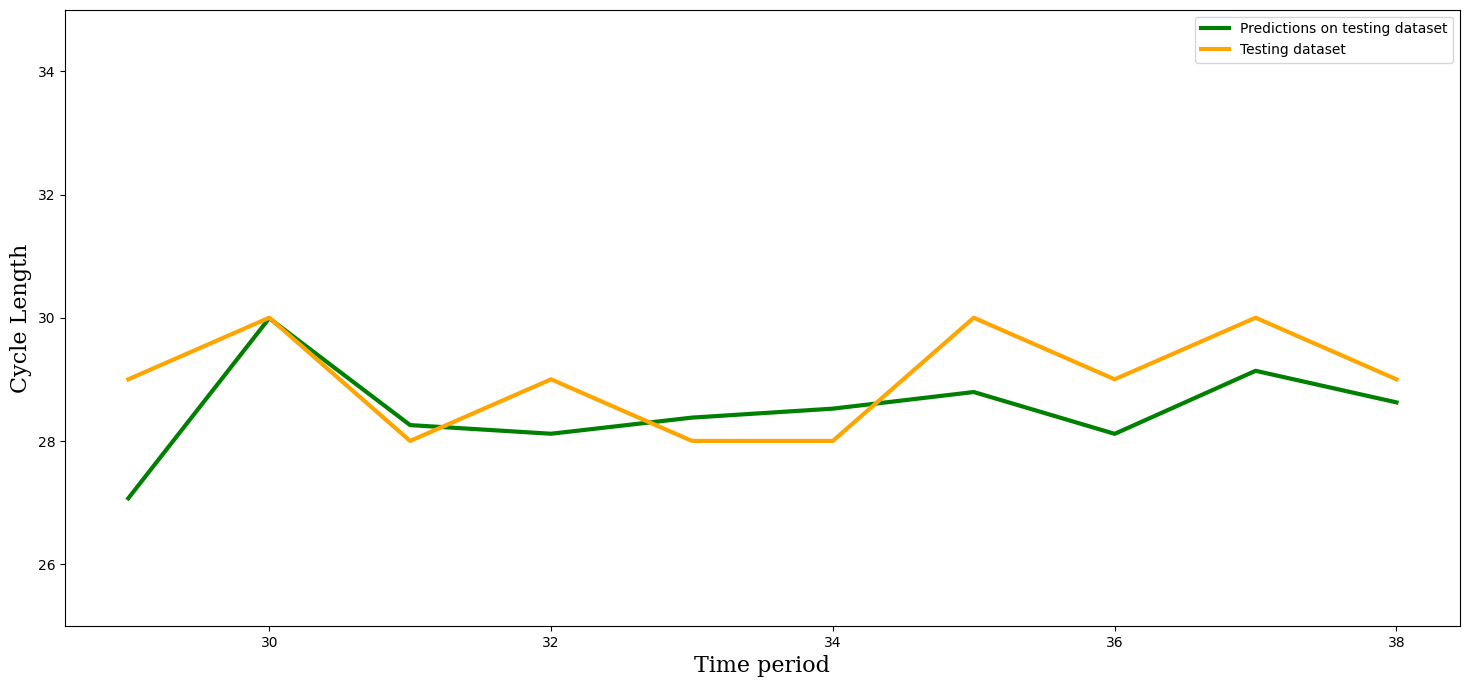

In [136]:
prediction=p
# Concatenate the past values and future predictions
all_prediction = pd.concat([prediction, future_predictions])
font = {'family': 'serif', 'color': 'black', 'weight': 'normal', 'size': 16}
plt.figure(figsize=(18,8))
# Plot the past values and future predictions
plt.plot(prediction,label='Predictions on testing dataset',color='green',linewidth=3)
#plt.plot(future_predictions, label = 'Predictions of future value',color='black',linewidth=3)

plt.plot(X_test, label = 'Testing dataset', color='orange',linewidth=3)
plt.legend(loc='best')
plt.ylim(25, 35)
plt.xlabel("Time period", fontdict=font)
plt.ylabel("Cycle Length", fontdict=font)
plt.show()
